In [284]:
import numpy as np
import pandas as pd
autos = pd.read_csv("autos.csv", encoding="Latin-1")


#The aim of this project is to clean the data and analyze the included used car listings.

In [327]:
autos

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2016-03-27 14:38:19,Audi_Q5_3.0_TDI_qu._S_tr.__Navi__Panorama__Xenon,privat,Angebot,24900,control,limousine,2011,automatik,239,q5,100000,1,diesel,audi,nein,2016-03-27 00:00:00,0,82131,2016-04-01 13:47:40
49996,2016-03-28 10:50:25,Opel_Astra_F_Cabrio_Bertone_Edition___TÜV_neu+...,privat,Angebot,1980,control,cabrio,1996,manuell,75,astra,150000,5,benzin,opel,nein,2016-03-28 00:00:00,0,44807,2016-04-02 14:18:02
49997,2016-04-02 14:44:48,Fiat_500_C_1.2_Dualogic_Lounge,privat,Angebot,13200,test,cabrio,2014,automatik,69,500,5000,11,benzin,fiat,nein,2016-04-02 00:00:00,0,73430,2016-04-04 11:47:27
49998,2016-03-08 19:25:42,Audi_A3_2.0_TDI_Sportback_Ambition,privat,Angebot,22900,control,kombi,2013,manuell,150,a3,40000,11,diesel,audi,nein,2016-03-08 00:00:00,0,35683,2016-04-05 16:45:07


In [328]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48028 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_crawled        48028 non-null  object
 1   name                48028 non-null  object
 2   seller              48028 non-null  object
 3   offer_type          48028 non-null  object
 4   price               48028 non-null  int64 
 5   abtest              48028 non-null  object
 6   vehicle_type        44903 non-null  object
 7   registration_year   48028 non-null  int64 
 8   gearbox             45604 non-null  object
 9   power_PS            48028 non-null  int64 
 10  model               45560 non-null  object
 11  odometer_km         48028 non-null  int64 
 12  registration_month  48028 non-null  int64 
 13  fuel_type           44301 non-null  object
 14  brand               48028 non-null  object
 15  unrepaired_damage   39040 non-null  object
 16  ad_created          48

In [329]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [330]:
autos.columns

Index(['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen'],
      dtype='object')

In [331]:
cols = ['date_crawled', 'name', 'seller', 'offer_type', 'price', 'abtest',
       'vehicle_type', 'registration_year', 'gearbox', 'power_PS', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'nr_of_pictures', 'postal_code',
       'last_seen']

In [332]:
autos.columns = cols

In [333]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [334]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,48028,48028,48028,48028,4.802800e+04,48028,44903,48028.00000,45604,48028.000000,45560,48028.000000,48028.000000,44301,48028,39040,48028,48028.0,48028.000000,48028
unique,46375,37019,2,2,NaN,2,8,NaN,2,NaN,244,NaN,NaN,7,40,2,74,NaN,NaN,38102
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,76,48027,48027,NaN,24756,12859,NaN,35560,NaN,3815,NaN,NaN,29248,10188,34255,1878,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.585252e+03,NaN,NaN,2002.80351,NaN,117.070417,NaN,125544.161739,5.767760,NaN,NaN,NaN,NaN,0.0,50935.867327,NaN
std,NaN,NaN,NaN,NaN,4.843817e+05,NaN,NaN,7.31085,NaN,195.151278,NaN,40106.751417,3.696802,NaN,NaN,NaN,NaN,0.0,25792.079828,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1910.00000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.00000,NaN,71.000000,NaN,100000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.000000,NaN
50%,NaN,NaN,NaN,NaN,2.990000e+03,NaN,NaN,2003.00000,NaN,107.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49696.000000,NaN
75%,NaN,NaN,NaN,NaN,7.400000e+03,NaN,NaN,2008.00000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71665.000000,NaN


In [335]:
# Any columns that have mostly one value that are candidates to be dropped
# Any columns that need more investigation.
# Any examples of numeric data stored as text that needs to be cleaned 

In [336]:
autos.rename({"odometer": "odometer_km"}, axis=1, inplace=True)

In [ ]:
autos["price"]=autos["price"].str.replace("$","").str.replace(",","").str.strip().astype(int) 

In [ ]:
autos["odometer_km"]=autos["odometer_km"].str.replace("km","").str.replace(",","").str.strip().astype(int)

In [339]:
autos.head()

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,5000,control,bus,2004,manuell,158,andere,150000,3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,8500,control,limousine,1997,automatik,286,7er,150000,6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,8990,test,limousine,2009,manuell,102,golf,70000,7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,4350,control,kleinwagen,2007,automatik,71,fortwo,70000,6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,1350,test,kombi,2003,manuell,0,focus,150000,7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [340]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,abtest,vehicle_type,registration_year,gearbox,power_PS,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,nr_of_pictures,postal_code,last_seen
count,48028,48028,48028,48028,4.802800e+04,48028,44903,48028.00000,45604,48028.000000,45560,48028.000000,48028.000000,44301,48028,39040,48028,48028.0,48028.000000,48028
unique,46375,37019,2,2,NaN,2,8,NaN,2,NaN,244,NaN,NaN,7,40,2,74,NaN,NaN,38102
top,2016-03-19 17:36:18,Ford_Fiesta,privat,Angebot,NaN,test,limousine,NaN,manuell,NaN,golf,NaN,NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,76,48027,48027,NaN,24756,12859,NaN,35560,NaN,3815,NaN,NaN,29248,10188,34255,1878,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,9.585252e+03,NaN,NaN,2002.80351,NaN,117.070417,NaN,125544.161739,5.767760,NaN,NaN,NaN,NaN,0.0,50935.867327,NaN
std,NaN,NaN,NaN,NaN,4.843817e+05,NaN,NaN,7.31085,NaN,195.151278,NaN,40106.751417,3.696802,NaN,NaN,NaN,NaN,0.0,25792.079828,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,1910.00000,NaN,0.000000,NaN,5000.000000,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,1.150000e+03,NaN,NaN,1999.00000,NaN,71.000000,NaN,100000.000000,3.000000,NaN,NaN,NaN,NaN,0.0,30459.000000,NaN
50%,NaN,NaN,NaN,NaN,2.990000e+03,NaN,NaN,2003.00000,NaN,107.000000,NaN,150000.000000,6.000000,NaN,NaN,NaN,NaN,0.0,49696.000000,NaN
75%,NaN,NaN,NaN,NaN,7.400000e+03,NaN,NaN,2008.00000,NaN,150.000000,NaN,150000.000000,9.000000,NaN,NaN,NaN,NaN,0.0,71665.000000,NaN


In [341]:
price = autos["price"]
price.describe()

count    4.802800e+04
mean     9.585252e+03
std      4.843817e+05
min      0.000000e+00
25%      1.150000e+03
50%      2.990000e+03
75%      7.400000e+03
max      1.000000e+08
Name: price, dtype: float64

In [342]:
iqr = 7200 - 1100  
lower_bound = 1100 - (1.5 * iqr)
upper_bound = 7200 + (1.5 * iqr)

print(lower_bound)
print(upper_bound)

-8050.0
16350.0


In [343]:
autos = autos[autos["price"].between(1,16350)]
autos["price"].describe()

count    42959.000000
mean      4129.176680
std       3863.748169
min          1.000000
25%       1150.000000
50%       2750.000000
75%       6000.000000
max      16350.000000
Name: price, dtype: float64

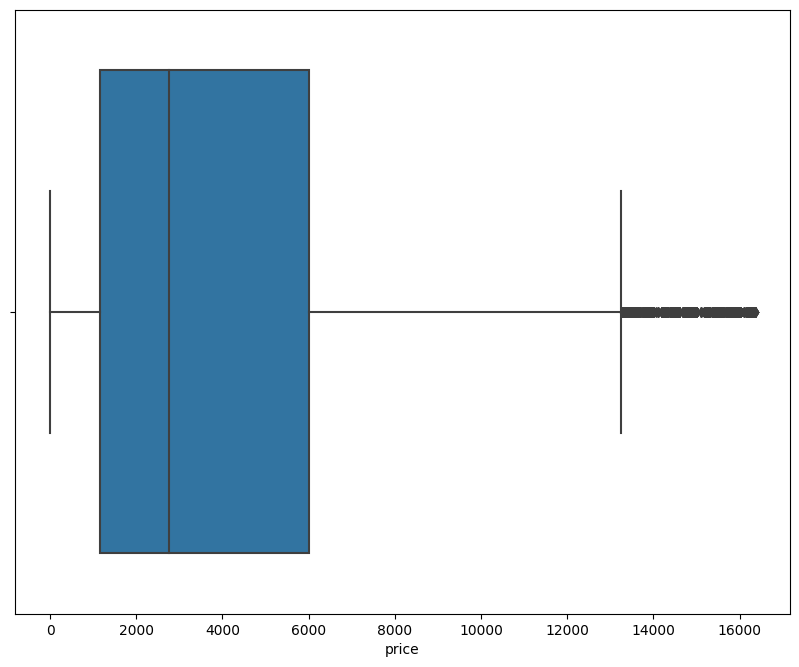

In [344]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,8))

np.warnings.filterwarnings('ignore')

sns.boxplot(autos["price"])
plt.show()


In [345]:
autos[['date_crawled','ad_created','last_seen']][0:5]

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


In [346]:
print(autos['date_crawled'].str[:10])

0        2016-03-26
1        2016-04-04
2        2016-03-26
3        2016-03-12
4        2016-04-01
            ...    
49993    2016-03-15
49994    2016-03-22
49996    2016-03-28
49997    2016-04-02
49999    2016-03-14
Name: date_crawled, Length: 42959, dtype: object


In [347]:
autos['date_crawled'].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05 14:06:30    0.000023
2016-03-05 14:06:40    0.000023
2016-03-05 14:07:04    0.000023
2016-03-05 14:07:21    0.000023
2016-03-05 14:07:26    0.000023
                         ...   
2016-04-07 14:07:04    0.000023
2016-04-07 14:30:09    0.000023
2016-04-07 14:30:26    0.000023
2016-04-07 14:36:44    0.000023
2016-04-07 14:36:55    0.000023
Name: date_crawled, Length: 41635, dtype: float64

In [348]:
autos['ad_created'].value_counts(normalize=True, dropna=False).sort_index()

2015-08-10 00:00:00    0.000023
2015-09-09 00:00:00    0.000023
2015-11-10 00:00:00    0.000023
2015-12-05 00:00:00    0.000023
2015-12-30 00:00:00    0.000023
                         ...   
2016-04-03 00:00:00    0.038991
2016-04-04 00:00:00    0.036826
2016-04-05 00:00:00    0.011616
2016-04-06 00:00:00    0.003143
2016-04-07 00:00:00    0.001187
Name: ad_created, Length: 71, dtype: float64

In [349]:
autos['last_seen'].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05 14:45:46    0.000023
2016-03-05 14:46:02    0.000023
2016-03-05 14:49:34    0.000023
2016-03-05 15:16:11    0.000023
2016-03-05 15:16:47    0.000023
                         ...   
2016-04-07 14:58:44    0.000070
2016-04-07 14:58:45    0.000023
2016-04-07 14:58:46    0.000023
2016-04-07 14:58:48    0.000070
2016-04-07 14:58:50    0.000070
Name: last_seen, Length: 35144, dtype: float64

In [350]:
autos['registration_year'].describe()

count    42959.000000
mean      2002.395191
std          6.750207
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2016.000000
Name: registration_year, dtype: float64

In [351]:
autos = autos[autos["registration_year"].between(1900 ,2016)]

In [352]:
autos["registration_year"].describe()

count    42959.000000
mean      2002.395191
std          6.750207
min       1910.000000
25%       1999.000000
50%       2003.000000
75%       2007.000000
max       2016.000000
Name: registration_year, dtype: float64

In [353]:
autos["registration_year"].value_counts(normalize=True)

2000    0.073140
2005    0.067227
1999    0.067227
2003    0.062129
2004    0.061920
          ...   
1929    0.000023
1941    0.000023
1953    0.000023
1938    0.000023
1952    0.000023
Name: registration_year, Length: 70, dtype: float64

In [354]:
autos["registration_year"].value_counts(normalize=True).sort_index().head(50)

1910    0.000116
1929    0.000023
1934    0.000047
1937    0.000070
1938    0.000023
1941    0.000023
1950    0.000070
1952    0.000023
1953    0.000023
1954    0.000047
1956    0.000093
1958    0.000070
1959    0.000093
1960    0.000466
1961    0.000116
1962    0.000093
1963    0.000093
1964    0.000210
1965    0.000256
1966    0.000256
1967    0.000372
1968    0.000396
1969    0.000349
1970    0.000815
1971    0.000442
1972    0.000605
1973    0.000442
1974    0.000349
1975    0.000372
1976    0.000396
1977    0.000442
1978    0.000861
1979    0.000629
1980    0.001816
1981    0.000605
1982    0.000861
1983    0.001001
1984    0.001141
1985    0.002095
1986    0.001583
1987    0.001583
1988    0.003119
1989    0.003981
1990    0.007915
1991    0.007682
1992    0.008357
1993    0.009684
1994    0.014432
1995    0.028399
1996    0.031705
Name: registration_year, dtype: float64

In [355]:
autos["brand"].describe()

count          42959
unique            40
top       volkswagen
freq            9226
Name: brand, dtype: object

In [356]:
x = autos["brand"].value_counts(normalize=True)*100

In [357]:
x.head(6)

volkswagen       21.476291
opel             11.520287
bmw              10.354059
mercedes_benz     8.813054
audi              7.756233
ford              7.309295
Name: brand, dtype: float64

In [ ]:
autos["price"]=autos["price"].str.replace("$","").str.replace(",","").str.strip().astype(int) 

In [361]:
freqs = {}

auto_price = autos["brand"].value_counts(normalize=True)
brand_select = auto_price[x > 5].index

price_dict = {}

for a in brand_select:
    brand_rows = autos[autos["brand"] == a]
    mean_price = brand_rows["price"].mean()
    price_dict[a] = int(mean_price)

price_dict




{'volkswagen': 4183,
 'opel': 2712,
 'bmw': 5649,
 'mercedes_benz': 5259,
 'audi': 5703,
 'ford': 2944,
 'renault': 2281}